## WeatherPy Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key"
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

609

In [3]:
# replace spaces in city names with '+' 
for index, city in enumerate(cities):
    cities[index] = city.replace(' ', '+')
#print(cities)

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=


In [5]:
# test response with random city
test = requests.get(query_url + 'san diego').json()
print(json.dumps(test, sort_keys=True, indent=4))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 32.72,
        "lon": -117.16
    },
    "dt": 1533666360,
    "id": 5391811,
    "main": {
        "humidity": 74,
        "pressure": 1011,
        "temp": 81.07,
        "temp_max": 89.6,
        "temp_min": 75.2
    },
    "name": "San Diego",
    "sys": {
        "country": "US",
        "id": 473,
        "message": 0.0053,
        "sunrise": 1533647240,
        "sunset": 1533696046,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "haze",
            "icon": "50d",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "speed": 4.7
    }
}


In [6]:
# set up lists to hold reponse info
used_cities = []
lats = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# keep count throughout loop; increment by 1 if request is successful
count = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        lats.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing record #{count} | City: {city}')
        print(query_url + city)
        used_cities.append(city)
        count += 1
    except Exception as e:
        print(f'Weather data not found for {city}...skipping.')
        print(f'Error raised: {e}')

print("\n-------------------------")
print("Data retrieval complete!")
print("-------------------------")

#print(f"The latitude information received is: {lats}")
#print(f"The temperature information received is: {temp}")
#print(f"The humidity information received is: {humidity}")
#print(f"The cloudiness information received is: {cloudiness}")
#print(f"The wind speed (mph) information received is: {wind_speed}")

Processing record #1 | City: new+norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=new+norfolk
Processing record #2 | City: ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
Processing record #3 | City: dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dunedin
Processing record #4 | City: airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=airai
Processing record #5 | City: punta+arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta+arenas
Processing record #6 | City: arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=arman
Processing record #7 | City: port+alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing record #53 | City: ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ilulissat
Processing record #54 | City: upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=upernavik
Processing record #55 | City: talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=talnakh
Processing record #56 | City: hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hobart
Processing record #57 | City: port+macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port+macquarie
Processing record #58 | City: kedgwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kedgwick
Processing record #59 | City: hami
http://api.openweathermap.org/data/2.5/weather?un

Processing record #105 | City: merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=merauke
Processing record #106 | City: lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lodja
Processing record #107 | City: atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=atar
Processing record #108 | City: davila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=davila
Processing record #109 | City: pakxan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=pakxan
Processing record #110 | City: saratovskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saratovskaya
Processing record #111 | City: nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing record #159 | City: pacific+grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=pacific+grove
Processing record #160 | City: englewood
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=englewood
Processing record #161 | City: viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=viedma
Processing record #162 | City: saint+george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint+george
Processing record #163 | City: sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sitka
Processing record #164 | City: praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=praya
Processing record #165 | City: dalvik
http://api.openweathermap.org/data/2.5/weather

Processing record #211 | City: burkburnett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=burkburnett
Processing record #212 | City: flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=flinders
Processing record #213 | City: monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=monrovia
Processing record #214 | City: kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kokopo
Processing record #215 | City: tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuatapere
Processing record #216 | City: tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiznit
Processing record #217 | City: sao+joao+da+barra
http://api.openweathermap.org/data/2.5/

Processing record #260 | City: sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinnamary
Weather data not found for pingzhuang...skipping.
Error raised: 'main'
Processing record #261 | City: matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=matagami
Weather data not found for burica...skipping.
Error raised: 'main'
Processing record #262 | City: tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tarakan
Processing record #263 | City: aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aklavik
Processing record #264 | City: vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vao
Processing record #265 | City: along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a11

Processing record #312 | City: sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sechura
Processing record #313 | City: margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=margate
Processing record #314 | City: manono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=manono
Weather data not found for catamarca...skipping.
Error raised: 'main'
Processing record #315 | City: port+hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port+hedland
Processing record #316 | City: suraabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=suraabad
Processing record #317 | City: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ostrovnoy
Weather data not

Processing record #361 | City: shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=shimoda
Processing record #362 | City: pingliang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=pingliang
Processing record #363 | City: chunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chunskiy
Processing record #364 | City: verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=verkhoyansk
Processing record #365 | City: ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ahipara
Processing record #366 | City: sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sorland
Processing record #367 | City: saint-pierre
http://api.openweathermap.org/data/2.5/wea

Processing record #412 | City: yhu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yhu
Processing record #413 | City: fez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fez
Processing record #414 | City: richards+bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=richards+bay
Processing record #415 | City: grand+baie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=grand+baie
Weather data not found for sahrak...skipping.
Error raised: 'main'
Processing record #416 | City: artesia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=artesia
Processing record #417 | City: todos+santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=todos+santos
Processing record #418 

Processing record #465 | City: kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kawalu
Processing record #466 | City: riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=riberalta
Weather data not found for rolim+de+moura...skipping.
Error raised: 'main'
Processing record #467 | City: tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiarei
Weather data not found for villazon...skipping.
Error raised: 'main'
Processing record #468 | City: rio+gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rio+gallegos
Processing record #469 | City: laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=laguna
Processing record #470 | City: suicheng
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing record #517 | City: quzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=quzhou
Processing record #518 | City: mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mezen
Processing record #519 | City: baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=baykit
Processing record #520 | City: el+campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=el+campo
Processing record #521 | City: lebork
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lebork
Processing record #522 | City: klaeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=klaeng
Processing record #523 | City: bwanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc

In [8]:
# Checking that lists are of equal lengths
print(len(temp))
print(len(lats))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(used_cities))

542
542
542
542
542
542


In [9]:
# create a dictionary from above lists
weather_dict = {
    "city": used_cities,
    "latitude": lats,
    "temp": temp,
    "humidity (%)": humidity,
    "cloudiness (%)": cloudiness,
    "wind speed (mph)": wind_speed  
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,city,latitude,temp,humidity (%),cloudiness (%),wind speed (mph)
0,new+norfolk,-42.78,53.60,54,75,17.22
1,ushuaia,-54.81,34.81,86,40,3.85
2,dunedin,-45.87,36.56,85,80,3.96
3,airai,-8.93,61.04,85,0,1.72
4,punta+arenas,-53.16,34.77,100,90,5.82
5,arman,59.70,55.40,93,90,11.18
6,port+alfred,-33.59,56.54,93,56,24.54
7,palampur,32.11,45.56,97,92,0.72
8,ferrol,43.48,65.21,82,75,5.82
9,tuktoyaktuk,69.44,50.00,76,75,13.87


In [ ]:
# export dataframe to csv file
weather_data.to_csv('output/weather_data.csv')

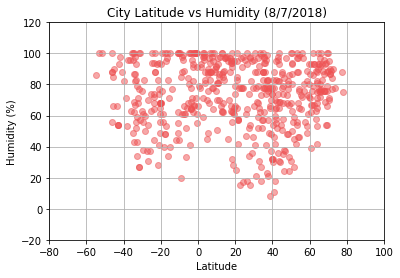

In [26]:
# create a graph that plots latitude vs humidity
plt.scatter(weather_data['latitude'], weather_data['humidity (%)'], color='#ee5253', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid()
plt.title('City Latitude vs Humidity (8/7/2018)')
plt.savefig('graphs/latvshum.png')
plt.show()

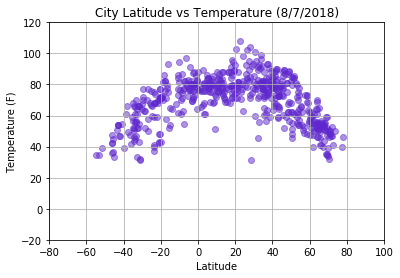

In [21]:
# create a graph that plots latitude vs temperature
plt.scatter(weather_data['latitude'], weather_data['temp'], color='#5f27cd', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('City Latitude vs Temperature (8/7/2018)')
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.grid()
plt.savefig('graphs/latvstemp.png')
plt.show()

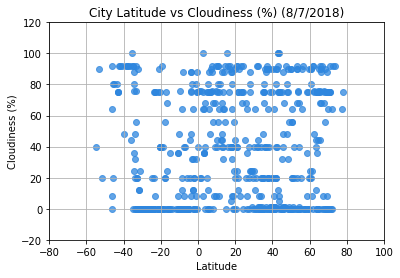

In [24]:
# create a graph that plots latitude vs cloudiness
plt.scatter(weather_data['latitude'], weather_data['cloudiness (%)'], color='#2e86de', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs Cloudiness (%) (8/7/2018)')
plt.xlim(-80,100)
plt.ylim(-20, 120)
plt.grid()
plt.savefig('graphs/latvscloud.png')
plt.show()

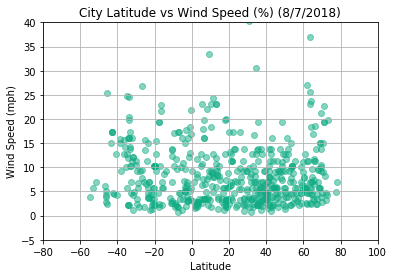

In [25]:
# create a graph that plots latitude vs wind speed
plt.scatter(weather_data['latitude'], weather_data['wind speed (mph)'], color='#10ac84', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs Wind Speed (%) (8/7/2018)')
plt.xlim(-80,100)
plt.ylim(-5, 40)
plt.grid()
plt.savefig('graphs/latvswindspeed.png')